In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importation des classes nécessaires de scikit-survival
from sksurv.datasets import load_veterans_lung_cancer
from sksurv.ensemble import RandomSurvivalForest
from sksurv.preprocessing import OneHotEncoder
from sksurv.metrics import concordance_index_ipcw
from sksurv.util import Surv

In [74]:
# Charger le dataset
data = load_veterans_lung_cancer()

In [88]:
# Préparer les covariables et la cible
X_raw = pd.DataFrame(data[0])  # Les covariables


y = pd.DataFrame(data[1]) # Les données de survie (temps de survie et statut de l'événement)

y= y.rename(columns={"Status": "event", "Survival_in_days": "duration"})



In [143]:
surv_label = y[["duration", "event"]].values
surv_label

array([[72.0, True],
       [411.0, True],
       [228.0, True],
       [126.0, True],
       [118.0, True],
       [10.0, True],
       [82.0, True],
       [110.0, True],
       [314.0, True],
       [100.0, False],
       [42.0, True],
       [8.0, True],
       [144.0, True],
       [25.0, False],
       [11.0, True],
       [30.0, True],
       [384.0, True],
       [4.0, True],
       [54.0, True],
       [13.0, True],
       [123.0, False],
       [97.0, False],
       [153.0, True],
       [59.0, True],
       [117.0, True],
       [16.0, True],
       [151.0, True],
       [22.0, True],
       [56.0, True],
       [21.0, True],
       [18.0, True],
       [139.0, True],
       [20.0, True],
       [31.0, True],
       [52.0, True],
       [287.0, True],
       [18.0, True],
       [51.0, True],
       [122.0, True],
       [27.0, True],
       [54.0, True],
       [7.0, True],
       [63.0, True],
       [392.0, True],
       [10.0, True],
       [8.0, True],
       [92.0, Tru

In [101]:
np.array(y)

array([[True, 72.0],
       [True, 411.0],
       [True, 228.0],
       [True, 126.0],
       [True, 118.0],
       [True, 10.0],
       [True, 82.0],
       [True, 110.0],
       [True, 314.0],
       [False, 100.0],
       [True, 42.0],
       [True, 8.0],
       [True, 144.0],
       [False, 25.0],
       [True, 11.0],
       [True, 30.0],
       [True, 384.0],
       [True, 4.0],
       [True, 54.0],
       [True, 13.0],
       [False, 123.0],
       [False, 97.0],
       [True, 153.0],
       [True, 59.0],
       [True, 117.0],
       [True, 16.0],
       [True, 151.0],
       [True, 22.0],
       [True, 56.0],
       [True, 21.0],
       [True, 18.0],
       [True, 139.0],
       [True, 20.0],
       [True, 31.0],
       [True, 52.0],
       [True, 287.0],
       [True, 18.0],
       [True, 51.0],
       [True, 122.0],
       [True, 27.0],
       [True, 54.0],
       [True, 7.0],
       [True, 63.0],
       [True, 392.0],
       [True, 10.0],
       [True, 8.0],
       [True, 92.

In [89]:
from src.utils import convert_surv_label_structarray
surv_label_structarray = convert_surv_label_structarray(y[["duration", "event"]].values)

In [90]:
X_raw.head(10)

,Age_in_years,Celltype,Karnofsky_score,Months_from_Diagnosis,Prior_therapy,Treatment
0,69.0,squamous,60.0,7.0,no,standard
1,64.0,squamous,70.0,5.0,yes,standard
2,38.0,squamous,60.0,3.0,no,standard
3,63.0,squamous,60.0,9.0,yes,standard
4,65.0,squamous,70.0,11.0,yes,standard
5,49.0,squamous,20.0,5.0,no,standard
6,69.0,squamous,40.0,10.0,yes,standard
7,68.0,squamous,80.0,29.0,no,standard
8,43.0,squamous,50.0,18.0,no,standard
9,70.0,squamous,70.0,6.0,no,standard


In [112]:
np.unique(X_raw.Celltype)

array(['adeno', 'large', 'smallcell', 'squamous'], dtype=object)

In [91]:
y[1:10]

,event,duration
1,True,411.0
2,True,228.0
3,True,126.0
4,True,118.0
5,True,10.0
6,True,82.0
7,True,110.0
8,True,314.0
9,False,100.0


In [92]:
# Encoder les variables catégorielles (par ex. "celltype")
encoder = OneHotEncoder()
X = encoder.fit_transform(X_raw)

In [105]:
X.head(10)
#feat_cols = ["Age_in_years","Celltype=large","Celltype=smallcell","Celltype=squamous","Karnofsky_score","Months_from_Diagnosis","Prior_therapy=yes","Treatment=test"]
#feats = df[feat_cols]
print(X)

     Age_in_years  Celltype=large  Celltype=smallcell  Celltype=squamous  \
0            69.0             0.0                 0.0                1.0   
1            64.0             0.0                 0.0                1.0   
2            38.0             0.0                 0.0                1.0   
3            63.0             0.0                 0.0                1.0   
4            65.0             0.0                 0.0                1.0   
..            ...             ...                 ...                ...   
132          65.0             1.0                 0.0                0.0   
133          64.0             1.0                 0.0                0.0   
134          67.0             1.0                 0.0                0.0   
135          65.0             1.0                 0.0                0.0   
136          37.0             1.0                 0.0                0.0   

     Karnofsky_score  Months_from_Diagnosis  Prior_therapy=yes  Treatment=test  
0     

In [95]:
# Créer un modèle de Random Survival Forest
rsf = RandomSurvivalForest(n_estimators=500, min_samples_split=10, min_samples_leaf=15, random_state=42)

# Ajuster le modèle aux données
rsf.fit(X,surv_label_structarray )

RandomSurvivalForest(min_samples_leaf=15, min_samples_split=10,
                     n_estimators=500, random_state=42)

In [113]:
# Prédiction des courbes de survie pour les patients
# Pour simplifier, on prédit pour les 5 premiers patients
pred_surv_curves = rsf.predict_survival_function(X.iloc[:10, :])


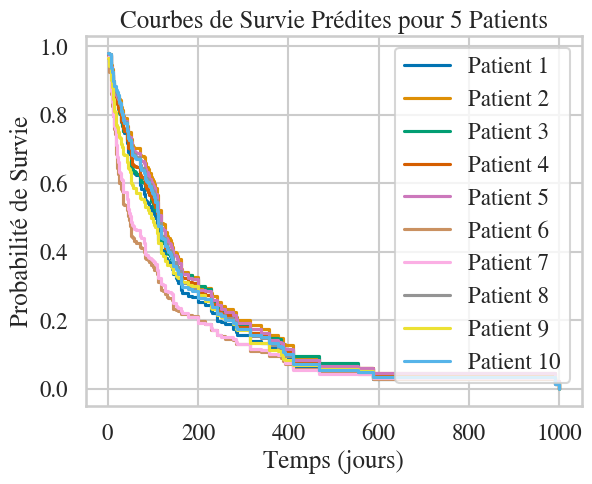

In [114]:
# Visualisation des courbes de survie prédites pour ces patients
for i, surv_func in enumerate(pred_surv_curves):
    plt.step(surv_func.x, surv_func.y, where="post", label=f"Patient {i + 1}")

plt.ylabel("Probabilité de Survie")
plt.xlabel("Temps (jours)")
plt.title("Courbes de Survie Prédites pour 5 Patients")
plt.legend()
plt.grid(True)
plt.show()

In [171]:
# Load model explainer
from Lucas.src.explainer import explainer
model_explainer = explainer(rsf, X,np.array(y),times = [i for i in range(1, 700,10)])

In [172]:
rsf.predict_cumulative_hazard_function

<bound method RandomSurvivalForest.predict_cumulative_hazard_function of RandomSurvivalForest(min_samples_leaf=15, min_samples_split=10,
                     n_estimators=500, random_state=42)>

In [173]:
"sksurv" in rsf.__module__

True

In [174]:
X.values

array([[69.,  0.,  0., ...,  7.,  0.,  0.],
       [64.,  0.,  0., ...,  5.,  1.,  0.],
       [38.,  0.,  0., ...,  3.,  0.,  0.],
       ...,
       [67.,  1.,  0., ..., 18.,  1.,  1.],
       [65.,  1.,  0., ...,  4.,  0.,  1.],
       [37.,  1.,  0., ...,  3.,  0.,  1.]])

C:\Users\ducro\anaconda3\envs\interpretability2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  warnings.warn(


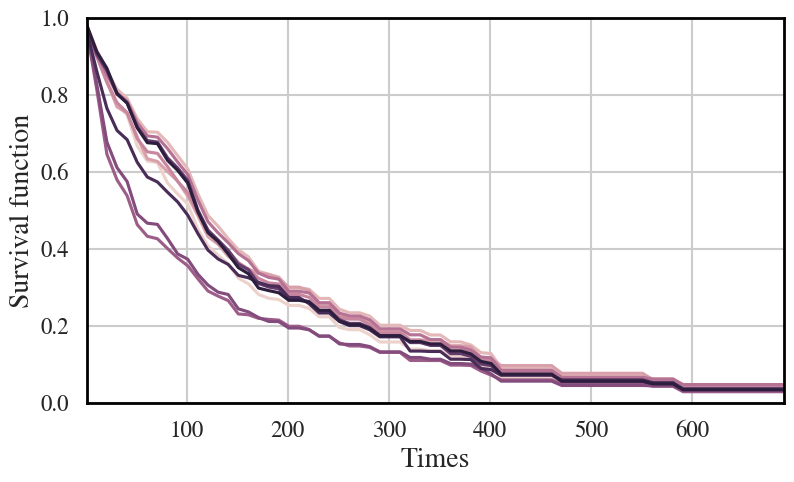

In [175]:
from Lucas.src import prediction
# select first 10 observations to be explained
explained_data = X[:10]
# Survival prediction
surv_pred = prediction.predict(model_explainer, explained_data)
prediction.plot_prediction(surv_pred, "survival")

C:\Users\ducro\anaconda3\envs\interpretability2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  warnings.warn(


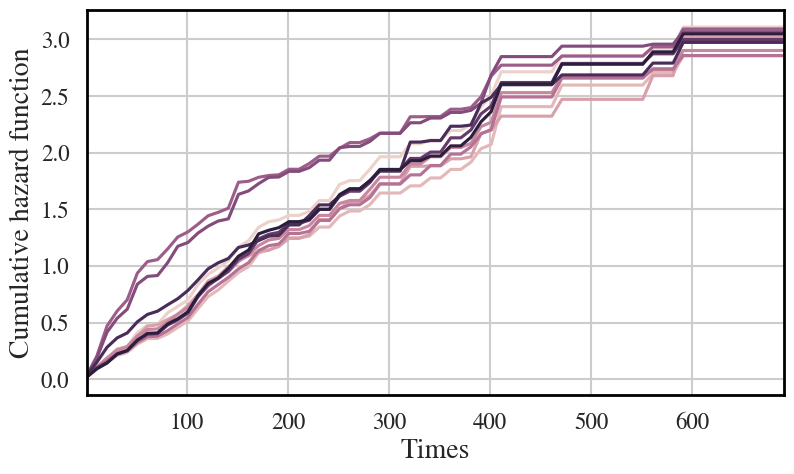

In [176]:
chf_pred = prediction.predict(model_explainer, explained_data, type="chf")
prediction.plot_prediction(chf_pred, "chf")

C:\Users\ducro\anaconda3\envs\interpretability2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  warnings.warn(


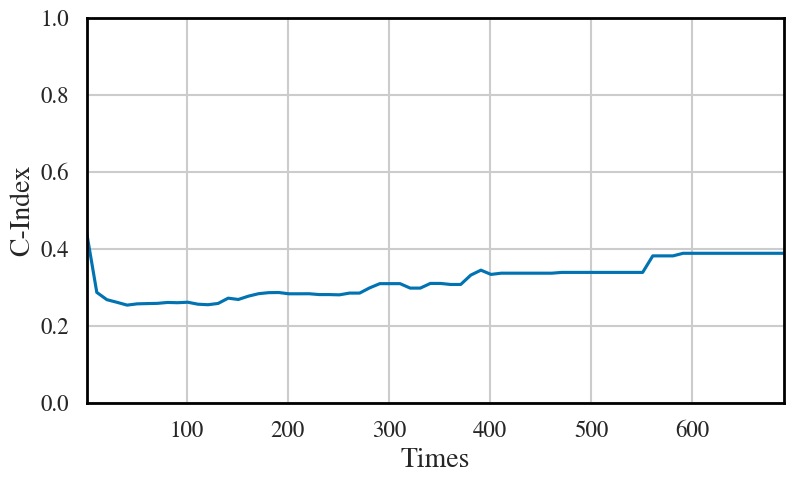

In [180]:
from src import performance
#eval_times = np.unique(surv_label[:, 0])[::10]
eval_times = [i for i in range(1, 700,10)]
#eval_times

# C-Index evaluation
cindex_perf = performance.evaluate(model_explainer, X, surv_label, times=eval_times, metric="c_index")
performance.plot_performance(cindex_perf, metric="c_index")

In [181]:
eval_times = [i for i in range(1, 700,10)]
eval_times

[1,
 11,
 21,
 31,
 41,
 51,
 61,
 71,
 81,
 91,
 101,
 111,
 121,
 131,
 141,
 151,
 161,
 171,
 181,
 191,
 201,
 211,
 221,
 231,
 241,
 251,
 261,
 271,
 281,
 291,
 301,
 311,
 321,
 331,
 341,
 351,
 361,
 371,
 381,
 391,
 401,
 411,
 421,
 431,
 441,
 451,
 461,
 471,
 481,
 491,
 501,
 511,
 521,
 531,
 541,
 551,
 561,
 571,
 581,
 591,
 601,
 611,
 621,
 631,
 641,
 651,
 661,
 671,
 681,
 691]

In [182]:
print(cindex_perf.head(20))

    times      perf
0     1.0  0.440652
1    11.0  0.286177
2    21.0  0.267208
3    31.0  0.260393
4    41.0  0.253124
5    51.0  0.256418
6    61.0  0.257099
7    71.0  0.257667
8    81.0  0.260052
9    91.0  0.259371
10  101.0  0.260620
11  111.0  0.255509
12  121.0  0.254146
13  131.0  0.257440
14  141.0  0.271184
15  151.0  0.267776
16  161.0  0.276408
17  171.0  0.282769
18  181.0  0.285495
19  191.0  0.285836


C:\Users\ducro\anaconda3\envs\interpretability2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  warnings.warn(


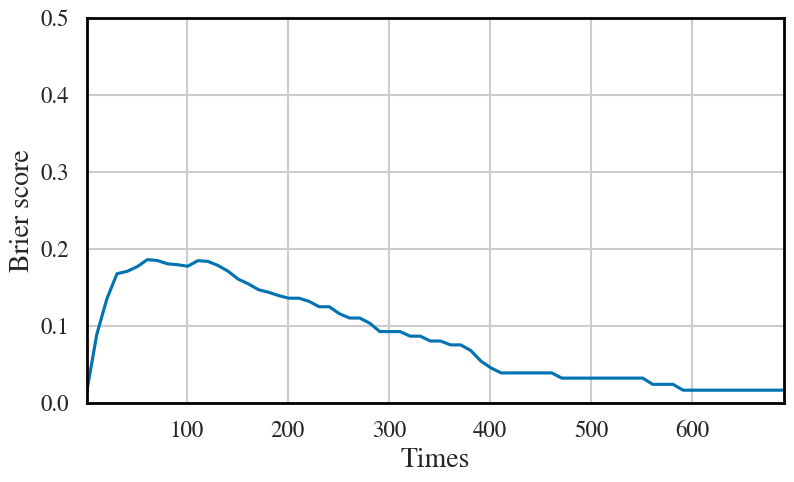

In [183]:
# Brier score evaluation
bs_perf = performance.evaluate(model_explainer, X, surv_label, times=eval_times, metric="brier_score")
performance.plot_performance(bs_perf, metric="brier_score")

C:\Users\ducro\anaconda3\envs\interpretability2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomSurvivalForest was fitted with feature names
  warnings.warn(


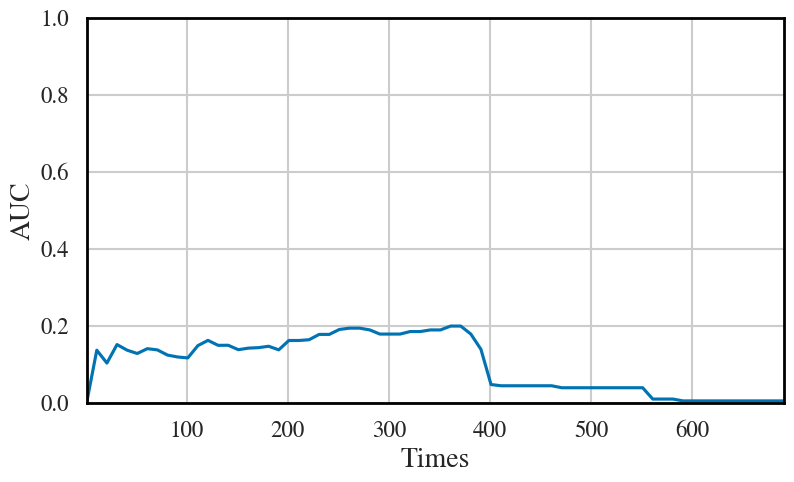

In [184]:
# AUC evaluation
auc_perf = performance.evaluate(model_explainer,X, surv_label, times=eval_times, metric="auc")
performance.plot_performance(auc_perf, metric="auc")

In [185]:
from src import local_explaination

In [ ]:
# individual conditional expectation
explained_feature = "x0"
ICE_df = local_explaination.individual_conditional_expectation(model_explainer, 
                                                               explained_feature, 
                                                               n_sel_samples=10, 
                                                               n_grid_points=10)
local_explaination.plot_ICE(ICE_df, explained_feature)